<IPython.core.display.Javascript object>


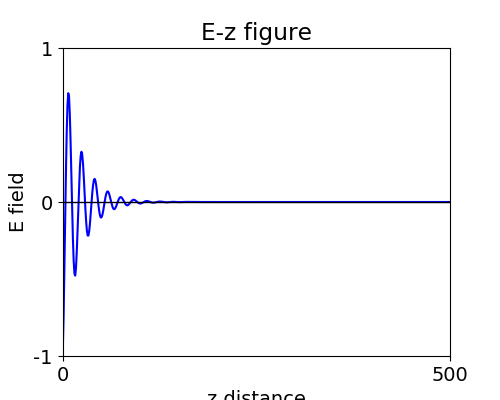

In [15]:
### Animation ###

import numpy as np
import scipy as sp
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
#w = np.linspace(w0-2*r,w0+2*r,100)
w=0.7
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c

# Set the range of z and time
zRange,zLength = 300, 500
z = np.linspace(0,zRange,zLength)
tLength = 1000000

# create figure and axes 
fig, (ax1) = plt.subplots(1,figsize=(5,4))

# creating our line objects for the plots
line, = ax1.plot(z, np.zeros(zLength), '-b')


def E_field(z,w,t):
    return np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )

def animate(t):
    
    # create our line object
    E = E_field(z,w,t)
    line.set_ydata(E)
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[0, zRange], xticklabels=['0', '500'],  # xticklabels=['0','zRange']
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '1'])
    #z1=20
    #plt.arrow(z1,0,0,E_field(z1,w,t))
    
def init():
    
    ax1.set_xlim(-0.25, 0.25)
    ax1.set_ylim(-1,1)
    ax1.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return line, 

# show the animation
ani = FuncAnimation(fig, animate, tLength, init_func=init, interval=tRange, blit=True)
plt.title('E-z figure')
plt.xlabel('z distance')
plt.ylabel('E field')
plt.show()



<IPython.core.display.Javascript object>


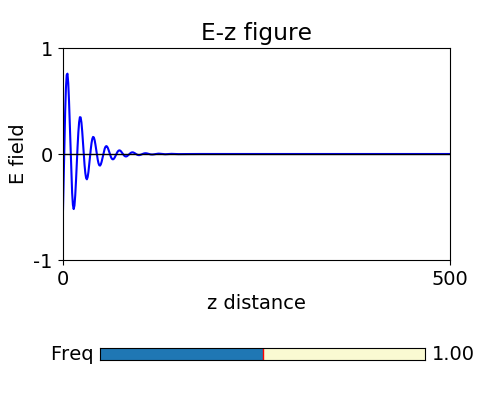

In [40]:
### 嘗試 Animation + Slide ###
### Animation ###

import numpy as np
import scipy as sp
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button, RadioButtons

# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 100000
#w = np.linspace(w0-2*r,w0+2*r,100)
w=0.7
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c

# Set the range of z and time
zRange,zLength = 300, 500
z = np.linspace(0,zRange,zLength)
tLength = 1000000

# create figure and axes
fig, (ax1) = plt.subplots(1,figsize=(5,4))
plt.title('E-z figure')
plt.xlabel('z distance')
plt.ylabel('E field')
plt.subplots_adjust(bottom=0.35)

# creating our line objects for the plots
line, = ax1.plot(z, np.zeros(zLength), '-b')

axcolor = 'lightgoldenrodyellow'
axomega = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)
somega = Slider(axomega, 'Freq', w0-2*r, w0+2*r, valinit=w0)


def update(val):
    w = somega.val
    fig.canvas.draw_idle()


def E_field(z,w,t):
    return np.real( E0 * np.exp(-kapa*z) * np.exp(1j*(k*z-w*t)) )

def animate(t):
    #update
    somega.on_changed(update)
    
    # create our line object
    E = E_field(z,w,t)
    line.set_ydata(E)
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[0, zRange], xticklabels=['0', '500'],  # xticklabels=['0','zRange']
             yticks=[-1, 0, 1], yticklabels=['-1', '0', '1'])
    #z1=20
    #plt.arrow(z1,0,0,E_field(z1,w,t))
    
    
def init():
    
    ax1.set_xlim(-0.25, 0.25)
    ax1.set_ylim(-1,1)
    ax1.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return line, 

# show the animation
ani = FuncAnimation(fig, animate, tLength, init_func=init, interval=tRange, blit=True)
plt.show()


<IPython.core.display.Javascript object>


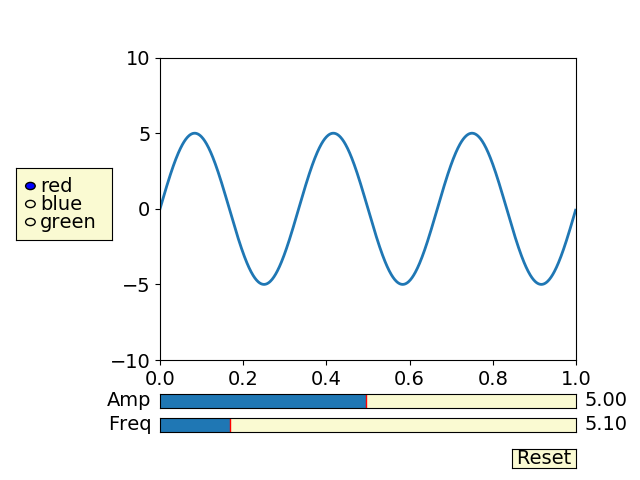

In [39]:
### Slide ###

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()


In [26]:
### w-alpha figure ###

import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
# Constant set
E0, w0, r = 1, 1, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 10**4
w = np.linspace(w0-2*r,w0+2*r,100)
#w=1
kapa = 0.5*N* q**2 * w**2 * r**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c
plt.plot(w,alpha)
#plt.plot(w,n-1)
plt.title('w-alpha figure')
plt.xlabel('w frequency')
plt.ylabel('alpha')
plt.show()

In [10]:
### w-n figure ###

import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
# Constant set
E0, w0, r = 1, 0.5, 0.3
q, m = 1.6* 10**-19 ,  9.11* 10**-31
epsilon0 = 8.85*10**-12
c = 3*10**8
N = 10**4
w = np.linspace(w0-2*r,w0+2*r,100)
#w=1
kapa = 0.5*N* q**2 * w**2 /(m*epsilon0*c*(r**2 * w**2 +(w0**2-w**2)**2))
alpha = 2*kapa
n = 1+(0.5*N* q**2 *(w0**2-w**2)/(m*epsilon0*(r**2 * w**2 +(w0**2-w**2)**2)))
k=n*w/c
#plt.plot(w,alpha)
plt.plot(w,n-1)
plt.title('w-n figure')
plt.xlabel('w frequency')
plt.ylabel('n')
plt.show()

<IPython.core.display.Javascript object>


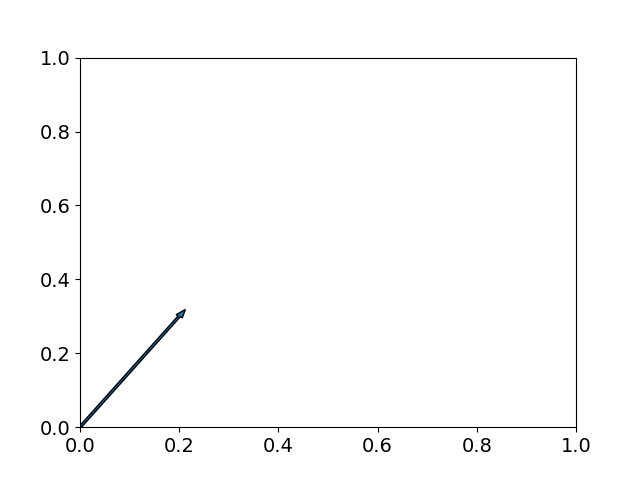

In [25]:
#arrow
import matplotlib.pyplot as plt

x,y,dx,dy=0,0,0.2,0.3
plt.arrow(x,y,dx,dy,width=0.005)
plt.show()